In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error, accuracy_score
import math
plt.rcParams["figure.figsize"] = (12,12)
from sklearn.model_selection import cross_val_score

In [ ]:
from google.colab import drive
from google.colab import files

In [ ]:
files.upload()


Saving predictive_maintenance.csv to predictive_maintenance.csv


{'predictive_maintenance.csv': b'\xef\xbb\xbfUDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type\r\n1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure\r\n2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure\r\n3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure\r\n4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure\r\n5,L47184,L,298.2,308.7,1408,40,9,0,No Failure\r\n6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure\r\n7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure\r\n8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure\r\n9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure\r\n10,M14869,M,298.5,309,1741,28,21,0,No Failure\r\n11,H29424,H,298.4,308.9,1782,23.9,24,0,No Failure\r\n12,H29425,H,298.6,309.1,1423,44.3,29,0,No Failure\r\n13,M14872,M,298.6,309.1,1339,51.1,34,0,No Failure\r\n14,M14873,M,298.6,309.2,1742,30,37,0,No Failure\r\n15,L47194,L,298.6,309.2,2035,19.6,40,0,No Failure\r\n16,L47195,L,298.6,309.2,1542,48.4,42,0,No Fa

In [ ]:
!ls

predictive_maintenance.csv  sample_data


In [ ]:

# сгенерируем данные
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.1 * np.random.randn(100)

In [ ]:
# функция для построения кривых регрессии
def plot_lc_re (model, X, Y):
    X_t, X_v, Y_t, Y_v = train_test_split(X, Y, test_size = 0.2, random_state = 5)
    
    acc_t, acc_v = [], [] 
    
    for m in range(1, len(X_t)):
        
        model.fit (X_t[:m], Y_t[:m])
        pred_t = model.predict(X_t[:m])
        pred_v = model.predict(X_v)
        
        
        acc_t.append(mean_squared_error(Y_t[:m], pred_t))
        acc_v.append(mean_squared_error(Y_v, pred_v))
        
        
    plt.plot(np.sqrt(acc_t), 'r--^')
    plt.plot(np.sqrt(acc_v), 'b-o')
    plt.grid()


In [ ]:
from sklearn.model_selection import train_test_split

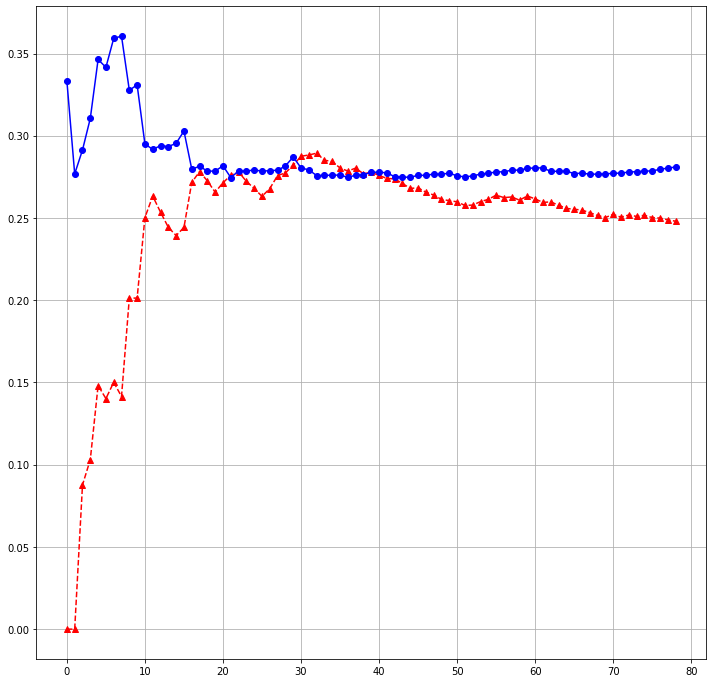

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
plot_lc_re(lr, X,y)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
pr = Pipeline([('pol', PolynomialFeatures(degree = 2)),
                ('lr', LinearRegression())])

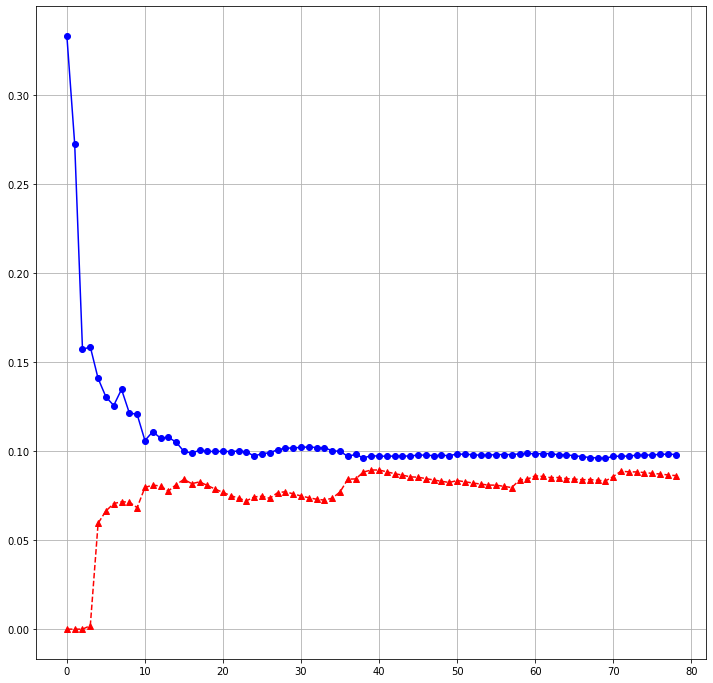

In [ ]:
plot_lc_re(pr, X,y)

In [ ]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [ ]:
y_pred = lr.predict(X)

In [ ]:
y_pred.mean(), (y-y_pred).std()

(0.26540437868843036, 0.2542012286035887)

In [ ]:
y.mean(), y.std()

(0.2654043786884303, 0.25691095046255646)

In [ ]:
pr.fit(X,y)

Pipeline(steps=[('pol', PolynomialFeatures()), ('lr', LinearRegression())])

In [ ]:
y_pred = pr.predict(X)

In [ ]:
y_pred.mean(), (y-y_pred).std()

(0.2654043786884304, 0.0881585881437672)

In [ ]:
# Дисперсия на 10 образцах

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split (X,y, test_size = 0.9, random_state = 0)

In [ ]:
# Дисперсия на 10 образцах


# Очень Интересная Задача
![image.png](attachment:image.png)

In [ ]:
df = pd.read_csv('predictive_maintenance.csv', index_col = 'UDI')

In [ ]:
df

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
UDI,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...
9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure


In [ ]:
# Осмотр данных

In [ ]:
df.Target.value_counts()

0    9661
1     339
Name: Target, dtype: int64

In [ ]:
df = df.drop(['Failure Type', 'Product ID'], axis = 1)
df = pd.get_dummies(df,columns=['Type'])

In [ ]:
Y = df.Target
X = df.drop(['Target'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split (X,Y, test_size = 0.25, random_state = 0, stratify = Y)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error, mean_absolute_error, accuracy_score

In [ ]:
# тупой класификатор

In [ ]:
accuracy_score(Y_test, np.zeros_like(Y_test))

0.966

In [ ]:
#SMOTE METHOD :ПОВЫШЕТ ТОЧНОСТЬ ПРИ РЕШЕНИИ НЕ СБАЛАНСИРОВАННЫХ ЗАДАЧ(КАК У НАС СЕЙЧАС)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(random_state=0)
rnd_clf.fit(X_train, Y_train)

pred_rf = rnd_clf.predict(X_test)

In [ ]:
precision_score(Y_test, pred_rf)

0.84

In [ ]:
recall_score(Y_test, pred_rf)

0.49411764705882355

In [ ]:
f1_score(Y_test, pred_rf)

0.6222222222222222

In [ ]:
accuracy_score(Y_test, pred_rf)

0.9796

## SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state = 2)

In [ ]:
X_train.shape

(7500, 8)

In [ ]:
X_res, Y_res = sm.fit_resample(X_train, Y_train)

In [ ]:
X_res.shape

(14492, 8)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(X_res, Y_res)

pred_rf = rnd_clf.predict(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X_train)

In [ ]:
model = models.Sequential()

model.add(layers.Dense(16, activation="relu", input_shape = (X_scaled.shape[1],)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [ ]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy", "AUC"])

In [ ]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=75, batch_size=128)

Epoch 1/75
59/59 [==============================] - 1s 9ms/step - loss: 2.2516 - accuracy: 0.9504 - auc: 0.5131 - val_loss: 0.3039 - val_accuracy: 0.9660 - val_auc: 0.6673
Epoch 2/75
59/59 [==============================] - 0s 2ms/step - loss: 0.2376 - accuracy: 0.9565 - auc: 0.7273 - val_loss: 0.1944 - val_accuracy: 0.9648 - val_auc: 0.7994
Epoch 3/75
59/59 [==============================] - 0s 3ms/step - loss: 0.1705 - accuracy: 0.9675 - auc: 0.8013 - val_loss: 0.1769 - val_accuracy: 0.9640 - val_auc: 0.7956
Epoch 4/75
59/59 [==============================] - 0s 3ms/step - loss: 0.1610 - accuracy: 0.9659 - auc: 0.7964 - val_loss: 0.1702 - val_accuracy: 0.9664 - val_auc: 0.7970
Epoch 5/75
59/59 [==============================] - 0s 3ms/step - loss: 0.1470 - accuracy: 0.9665 - auc: 0.7981 - val_loss: 0.1523 - val_accuracy: 0.9664 - val_auc: 0.7930
Epoch 6/75
59/59 [==============================] - 0s 3ms/step - loss: 0.1392 - accuracy: 0.9656 - auc: 0.7909 - val_loss: 0.1409 - val_acc

In [ ]:
pred_nn = model.predict(X_test)
X_test_scaled = scaler.transform(X_test)

In [ ]:
pred_nn

array([[0.04174739],
       [0.00709516],
       [0.04016146],
       ...,
       [0.00154808],
       [0.00121483],
       [0.00799203]], dtype=float32)

In [ ]:
pred_nn = pred_nn >0.5

In [ ]:
recall_score( Y_test, pred_nn)

0.023529411764705882

In [ ]:
precision_score(Y_test, pred_nn)

1.0

In [ ]:
f1_score(Y_test, pred_nn)

0.04597701149425288